pan-genome functional distribution comparison:
- nature1011 pangenome vs lg1360 pangenome vs this1800 pangenome


In [1]:
# load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir(r"D:\code\github\Unified_Yeast_GEMs_Database_from_13pro\Unified_Yeast_GEMs_Database")

In [2]:
# load pan-genome function annotation file,
na1011_function = pd.read_excel(r"data/genome/pan1011_v1_functional_annotations.xlsx",index_col=0,header=2)
lgpan_function = pd.read_excel(r"data/genome/lg1392_functional_annotations.xlsx",index_col=0,header=2)
this1800_function = pd.read_excel(r"data\genome\pan1800_v2_functional_annotations.xlsx",index_col=0,header=2)

In [3]:
def get_cog_counts(df_annotation,df_cog):
    '''get COG number counts'''
    df_annotation = df_annotation.dropna(subset=["COG_category"])
    cog_list = df_cog.index.tolist()
    cog_counts=pd.Series(index=cog_list)
    for i in cog_list:
        count = len(df_annotation[df_annotation["COG_category"].str.contains(i)])
        cog_counts[i] = count
    return cog_counts

# load COG category,set columns as "COG","category"
df_cog=pd.read_csv("data/cog_cotegory",index_col=0,sep="\t",header=None)
df_cog.columns=["color","description"]
# color列每个元素前加上‘#’
df_cog["color"]='#'+df_cog["color"].astype(str)
# cog_list=df_cog.index.tolist()

In [6]:
lg_cog_counts=get_cog_counts(lgpan_function,df_cog)
na_cog_counts=get_cog_counts(na1011_function,df_cog)
this_cog_counts=get_cog_counts(this1800_function,df_cog)
df_cog_counts=pd.DataFrame(columns=["lg1362_pangenome","this1800_pangenome","na1011_pangenome"])
df_cog_counts["lg1362_pangenome"]=lg_cog_counts
df_cog_counts["na1011_pangenome"]=na_cog_counts
df_cog_counts["this1800_pangenome"]=this_cog_counts
# remove cog that all counts are less than 10
df_cog_counts=df_cog_counts[(df_cog_counts>10).any(axis=1)]
df_cog_counts=df_cog_counts.astype(int)
cog_list=df_cog_counts.index.tolist()
# change column order as na1011_pangenome,lg1362_pangenome,this1800_pangenome
df_cog_counts=df_cog_counts[["na1011_pangenome","lg1362_pangenome","this1800_pangenome"]]
df_cog_counts

C:\Users\wangh\AppData\Local\Temp\ipykernel_40776\3874180906.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cog_counts=pd.Series(index=cog_list)
C:\Users\wangh\AppData\Local\Temp\ipykernel_40776\3874180906.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cog_counts=pd.Series(index=cog_list)
C:\Users\wangh\AppData\Local\Temp\ipykernel_40776\3874180906.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cog_counts=pd.Series(index=cog_list)


,na1011_pangenome,lg1362_pangenome,this1800_pangenome
J,414,399,392
A,352,323,330
K,604,496,527
L,247,252,255
B,100,86,91
D,164,148,150
Y,35,31,33
V,39,29,28
T,300,260,268
M,44,33,41


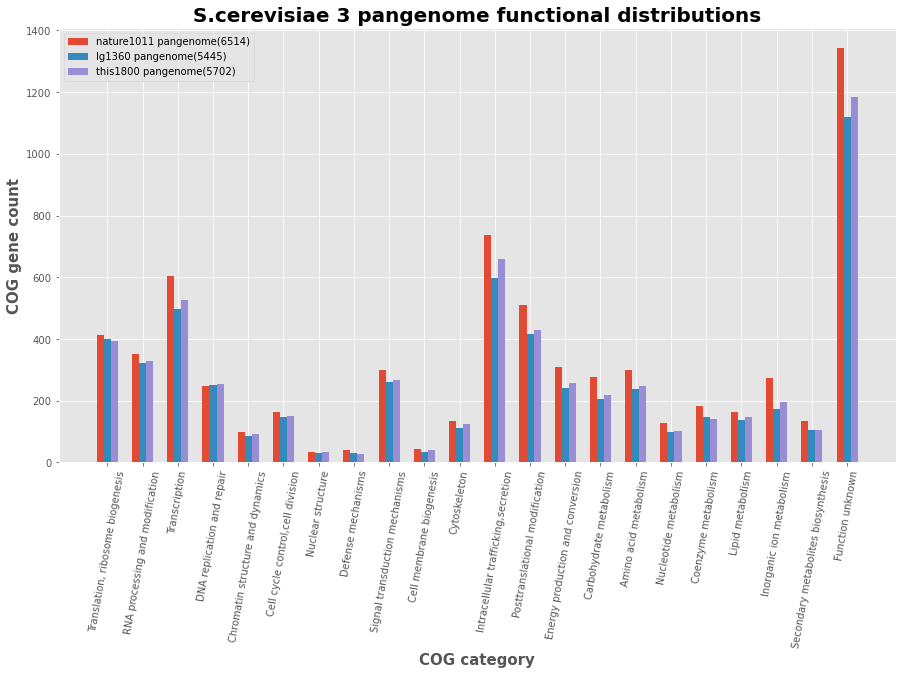

In [12]:
# plot grouped barplot to compare COG gene count in each COG category for 3 pangenome
plt.figure(figsize=(15,8))
# set a ggplot style
plt.style.use('ggplot')
bar_width = 0.2
index = np.arange(len(cog_list))
plt.bar(index, df_cog_counts['na1011_pangenome'], bar_width, label='nature1011 pangenome(%s)'%len(na1011_function))
plt.bar(index+bar_width, df_cog_counts['lg1362_pangenome'], bar_width, label='lg1360 pangenome(%s)'%len(lgpan_function))
plt.bar(index +2*bar_width , df_cog_counts['this1800_pangenome'], bar_width, label='this1800 pangenome(%s)'%len(this1800_function))
plt.xlabel('COG category',fontsize=15,fontweight='bold')
plt.ylabel('COG gene count',fontsize=15,fontweight='bold')
plt.title('S.cerevisiae 3 pangenome functional distributions',fontsize=20,fontweight='bold')
cog_description=df_cog[df_cog.index.isin(cog_list)]["description"].tolist()
plt.xticks(index+bar_width, cog_description,rotation=80,fontsize=10)
plt.legend()
plt.show()

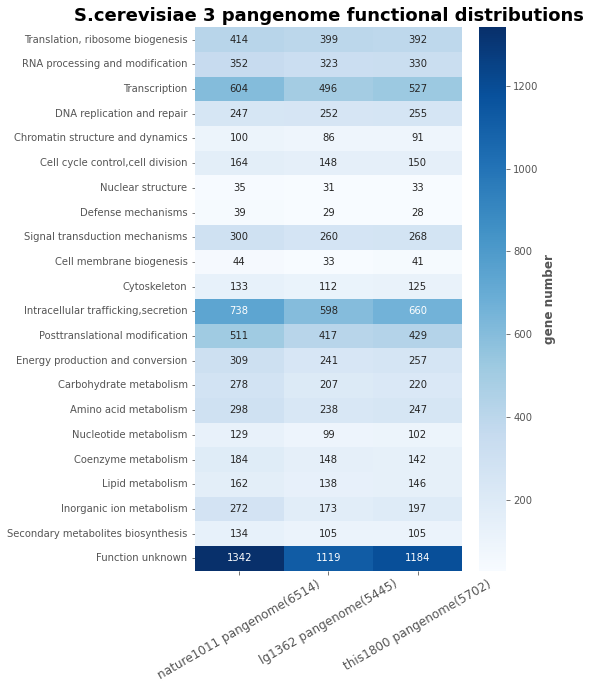

In [13]:
# plot heatmap to compare COG gene count in each COG category for 3 pangenome
plt.figure(figsize=(6,10))
plt.style.use('ggplot')
plt.title('S.cerevisiae 3 pangenome functional distributions',fontsize=18,fontweight='bold')
sns.heatmap(df_cog_counts,annot=True,fmt="d",cmap="Blues")
# set colorbar title
cbar = plt.gca().collections[0].colorbar
cbar.set_label('gene number',fontsize=12,fontweight='bold')
# rest xticklabels
xlabels=["nature1011 pangenome(%s)"%len(na1011_function),"lg1362 pangenome(%s)"%len(lgpan_function),"this1800 pangenome(%s)"%len(this1800_function)]
plt.xticks(np.arange(3)+0.5, xlabels,rotation=30,fontsize=12)
plt.yticks(np.arange(len(cog_list))+0.5, cog_description,rotation=0,fontsize=10)
plt.show()